In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.io import write_image
from venn import venn
from plotly.subplots import make_subplots

In [105]:
df = pd.read_csv('../data/clean_MWIW.csv')
process_df= pd.read_csv('../data/processed_MWIW.csv')

In [106]:
nan_cols = df.isnull().sum().tolist()[1:]
full_cols = df.notnull().sum().tolist()[1:]
cols = df.columns.tolist()[1:]

In [107]:
nan_df = pd.DataFrame({'attribute': cols, 'NaN count': nan_cols})
nan_df.sort_values(by='NaN count', inplace=True)
full_df = pd.DataFrame({'attribute': cols, 'Value present count': full_cols})
full_df.sort_values(by='Value present count', inplace=True, ascending=False)

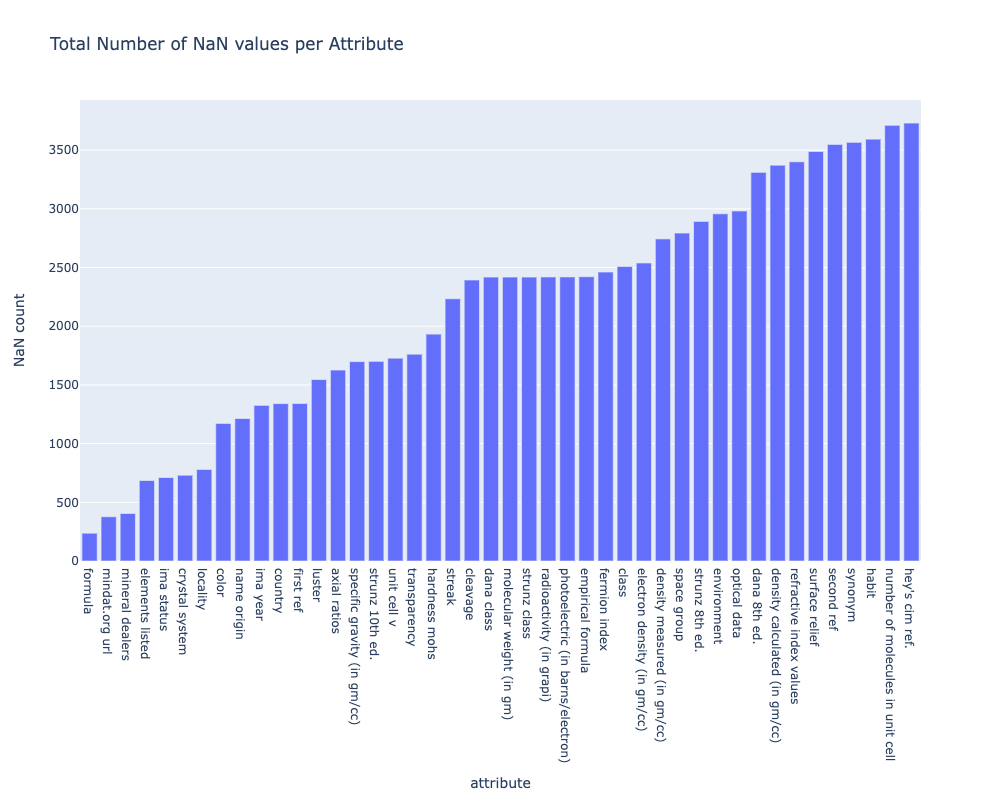

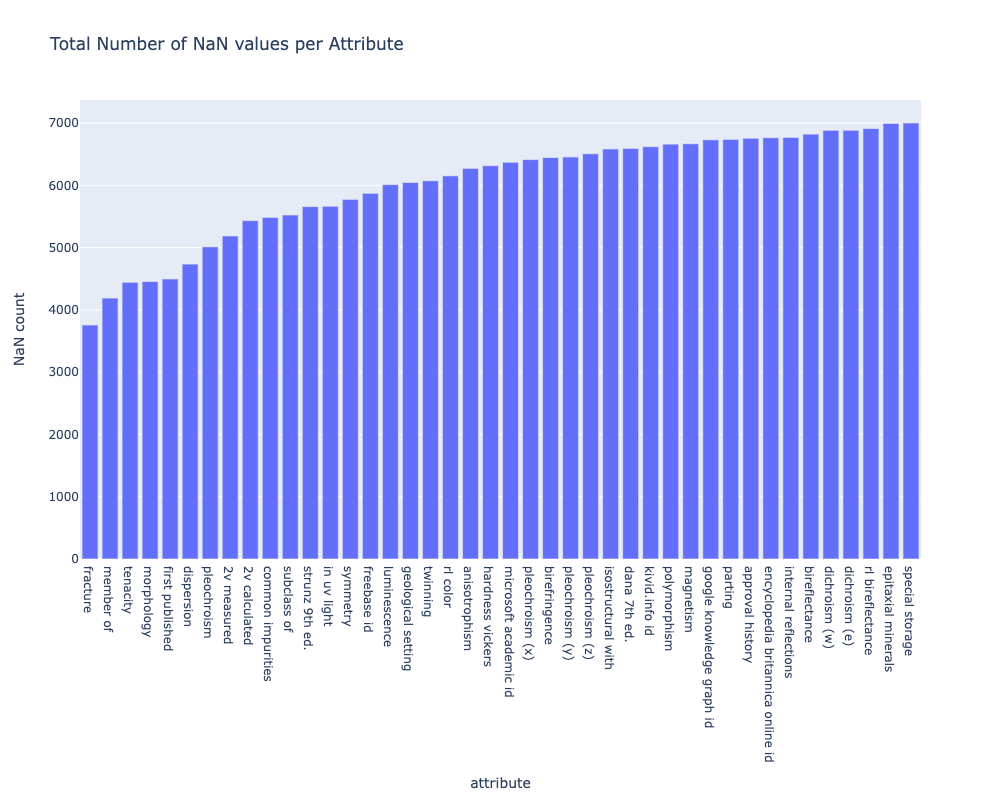

In [108]:
fig = px.bar(nan_df.iloc[:44], x='attribute', y='NaN count', width=2000, height=800, title="Total Number of NaN values per Attribute")
fig.show()
write_image(fig, "./Images/NaN_per_attribute_1.svg", format='svg')
fig = px.bar(nan_df.iloc[44:], x='attribute', y='NaN count', width=2000, height=800, title="Total Number of NaN values per Attribute")
fig.show()
write_image(fig, "./Images/NaN_per_attribute_2.svg", format='svg')

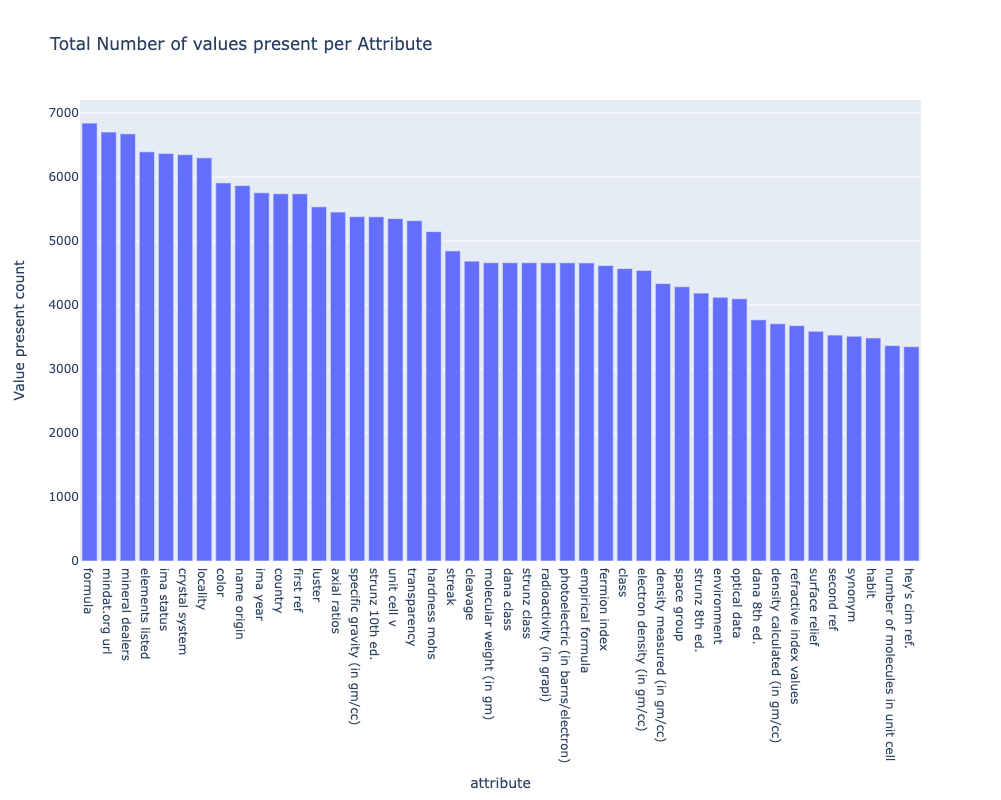

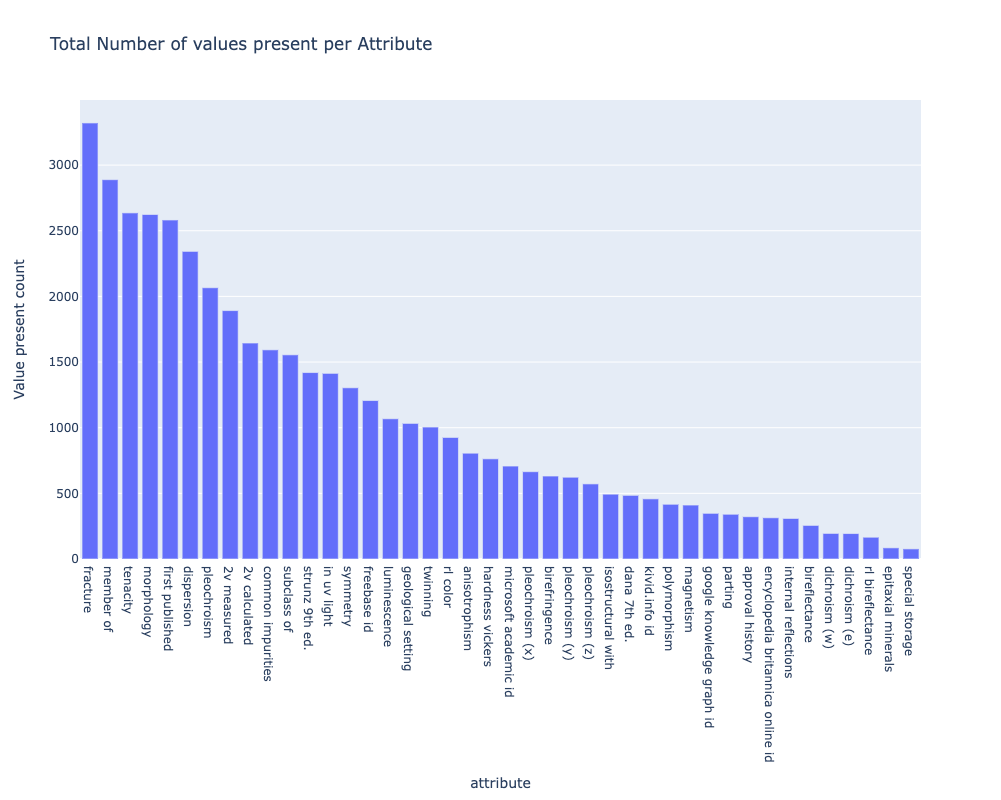

In [109]:
fig = px.bar(full_df.iloc[:44], x='attribute', y='Value present count', width=2000, height=800, title="Total Number of values present per Attribute")
fig.show()
write_image(fig, "./Images/full_per_attribute_1.svg", format='svg')
fig = px.bar(full_df.iloc[44:], x='attribute', y='Value present count', width=2000, height=800, title="Total Number of values present per Attribute")
fig.show()
write_image(fig, "./Images/full_per_attribute_2.svg", format='svg')

In [110]:
nan_cols = df.isnull().sum().tolist()[1:]
full_cols = df.notnull().sum().tolist()[1:]
nan_cols += process_df.isnull().sum().tolist()[1:]
full_cols += process_df.notnull().sum().tolist()[1:]
cols = df.columns.tolist()[1:]
cols_f = process_df.columns.tolist()[1:]
type_format = [] 
for i in cols:
    type_format.append('Original')
for i in cols_f:
    type_format.append('Filtered')
cols = cols + cols_f


In [111]:
len(cols), len(nan_cols)

(141, 141)

In [112]:
nan_df = pd.DataFrame({'attribute': cols, 'NaN count': nan_cols, 'type': type_format})
nan_df.sort_values(by='attribute', inplace=True)
full_df = pd.DataFrame({'attribute': cols, 'Value present count': full_cols, 'type': type_format})
full_df.sort_values(by='attribute', inplace=True, ascending=False)

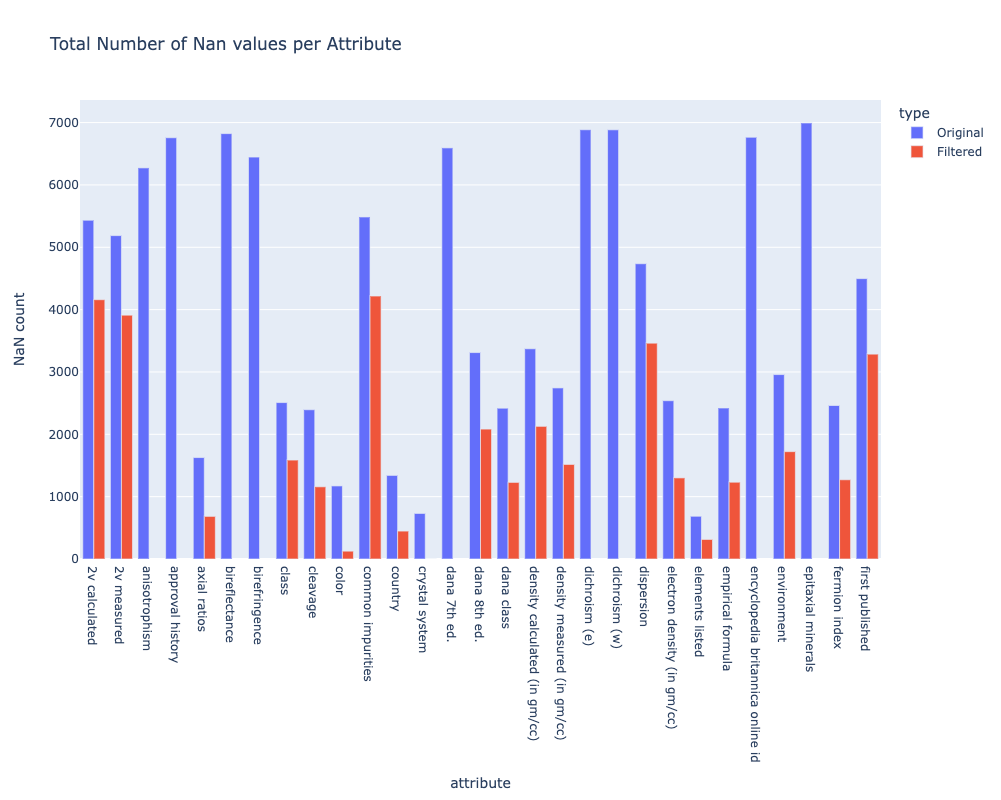

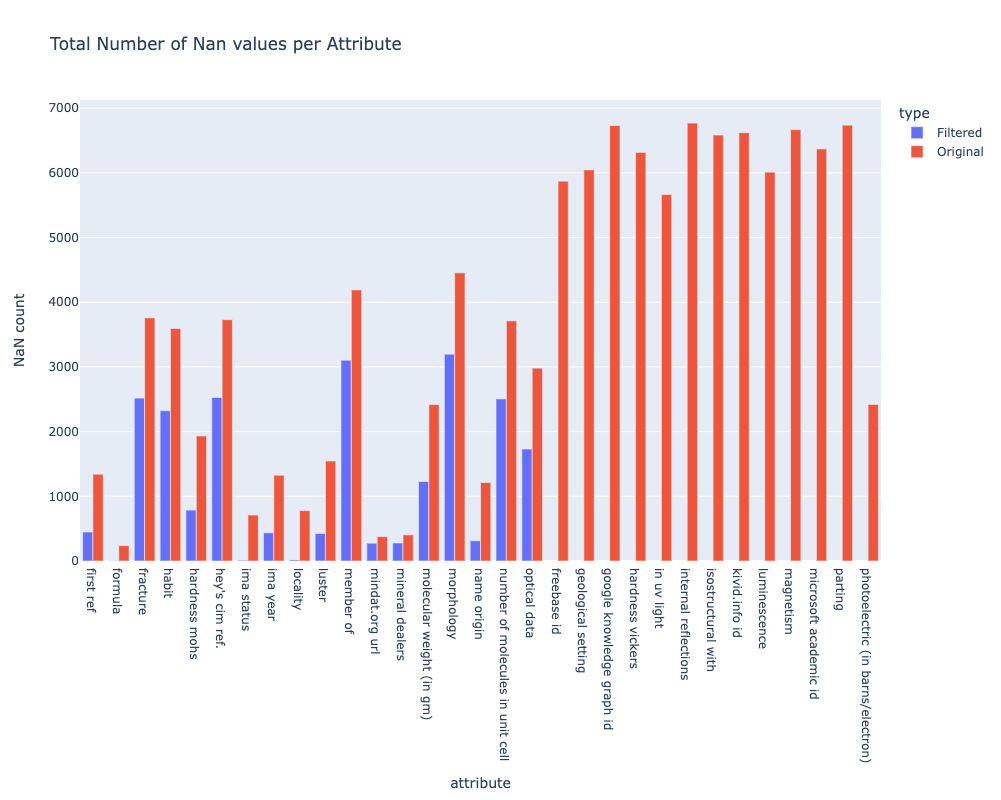

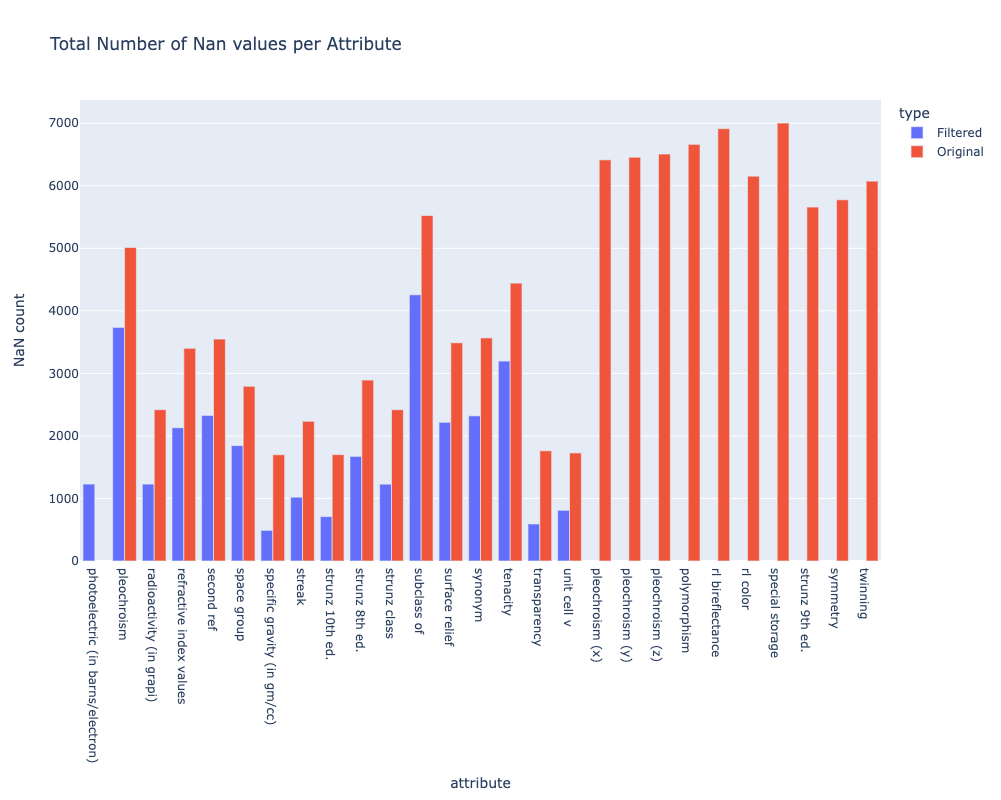

In [113]:
fig = px.bar(nan_df.iloc[:49], x='attribute', y='NaN count', color='type', barmode='group', width=2000, height=800, title="Total Number of Nan values per Attribute")
fig.show()
write_image(fig, "./Images/original_vs_filtered_nan_1.svg", format='svg')
fig = px.bar(nan_df.iloc[49:98], x='attribute', y='NaN count', color='type', barmode='group', width=2000, height=800, title="Total Number of Nan values per Attribute")
fig.show()
write_image(fig, "./Images/original_vs_filtered_nan_2.svg", format='svg')
fig = px.bar(nan_df.iloc[98:], x='attribute', y='NaN count', color='type', barmode='group', width=2000, height=800, title="Total Number of Nan values per Attribute")
fig.show()
write_image(fig, "./Images/original_vs_filtered_nan_3.svg", format='svg')

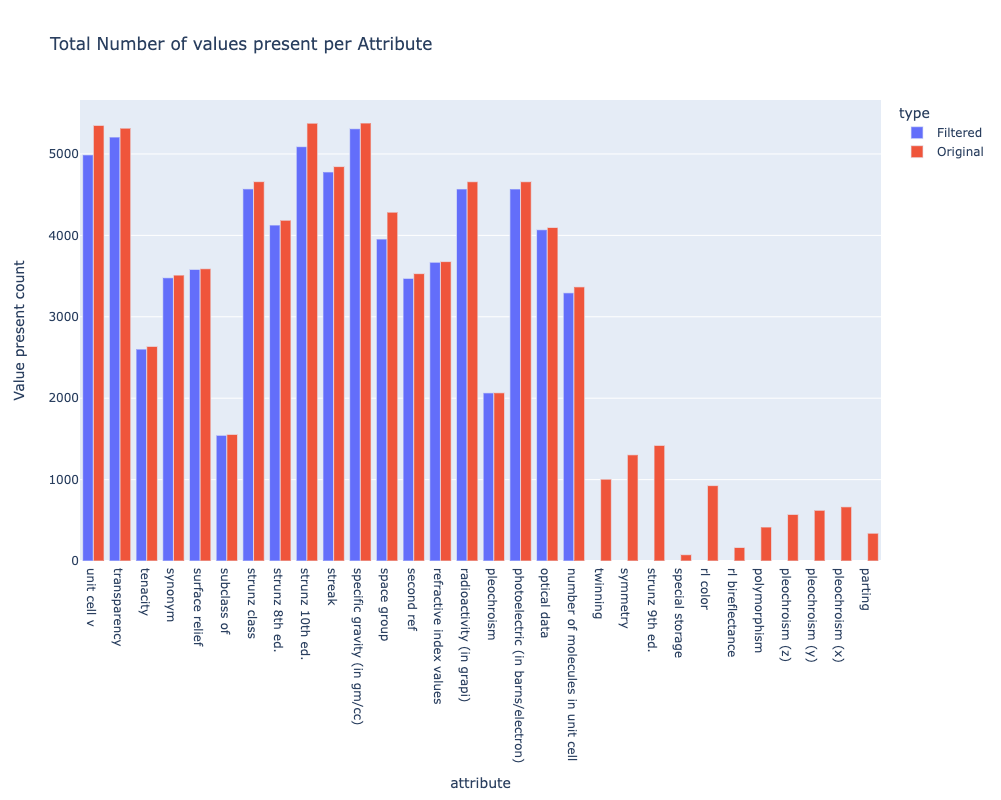

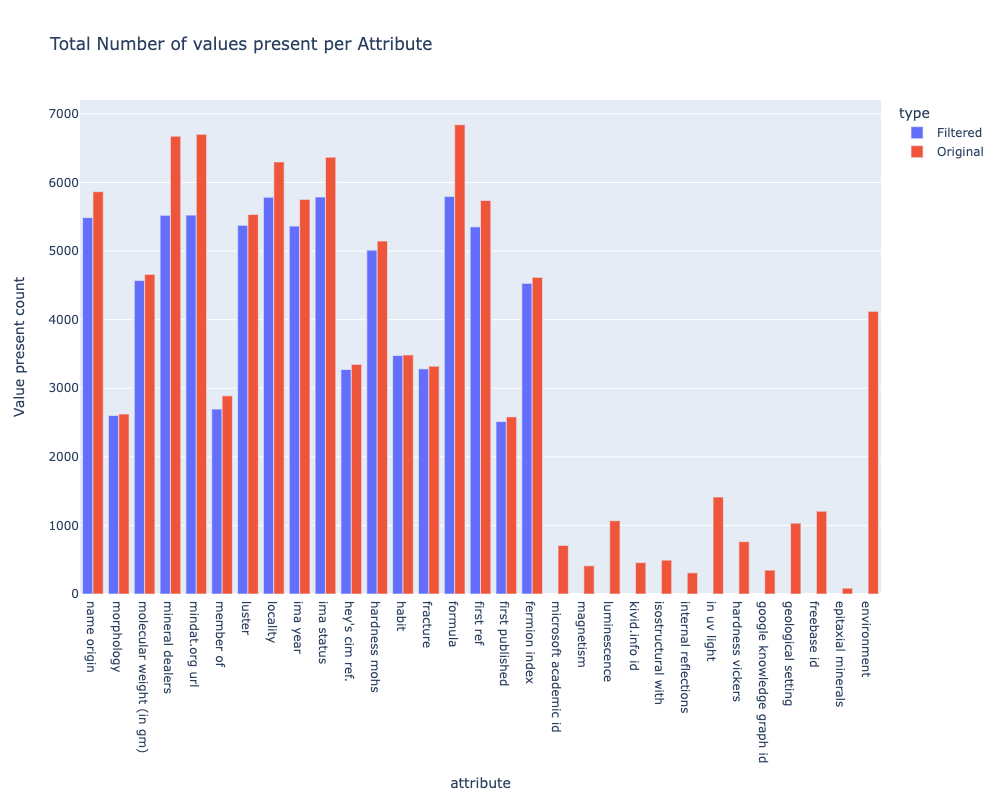

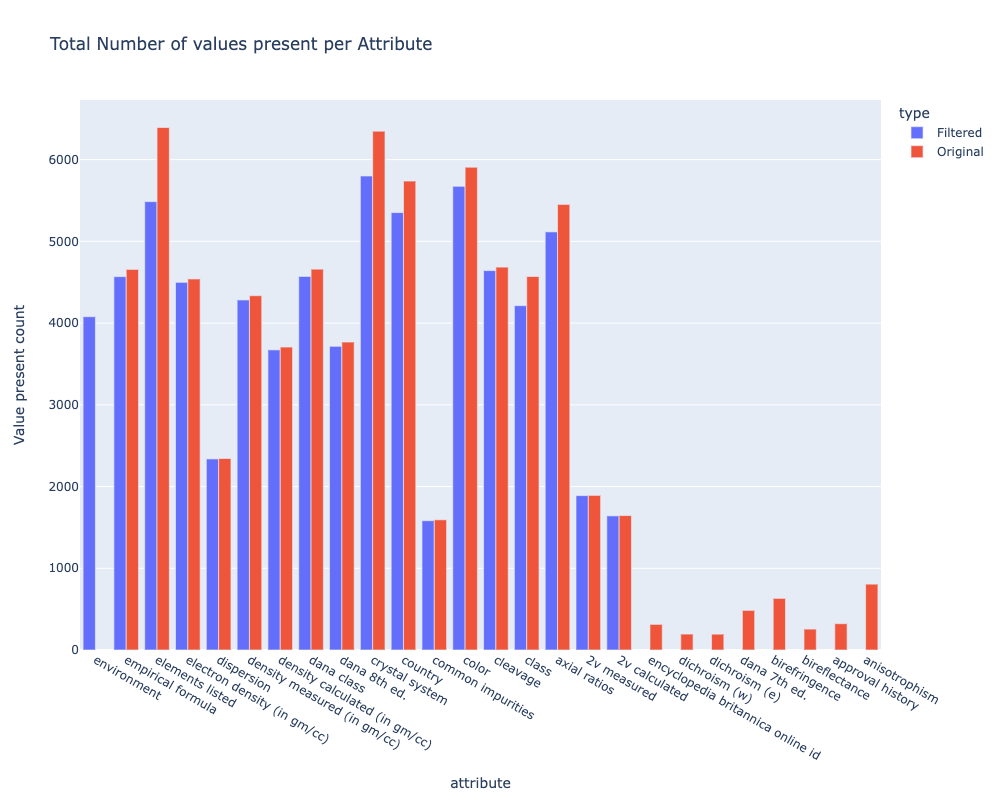

In [114]:
fig = px.bar(full_df.iloc[:49], x='attribute', y='Value present count', color='type', barmode='group', width=2000, height=800, title="Total Number of values present per Attribute")
fig.show()
write_image(fig, "./Images/original_vs_filtered_full_1.svg", format='svg')
fig = px.bar(full_df.iloc[49:98], x='attribute', y='Value present count', color='type', barmode='group', width=2000, height=800, title="Total Number of values present per Attribute")
fig.show()
write_image(fig, "./Images/original_vs_filtered_full_2.svg", format='svg')
fig = px.bar(full_df.iloc[98:], x='attribute', y='Value present count', color='type', barmode='group', width=2000, height=800, title="Total Number of values present per Attribute")
fig.show()
write_image(fig, "./Images/original_vs_filtered_full_3.svg", format='svg')

In [115]:
row = [df.shape[0], process_df.shape[0]]
col = ['row', 'row']
name = ['Merged & cleaned', 'Filtered']

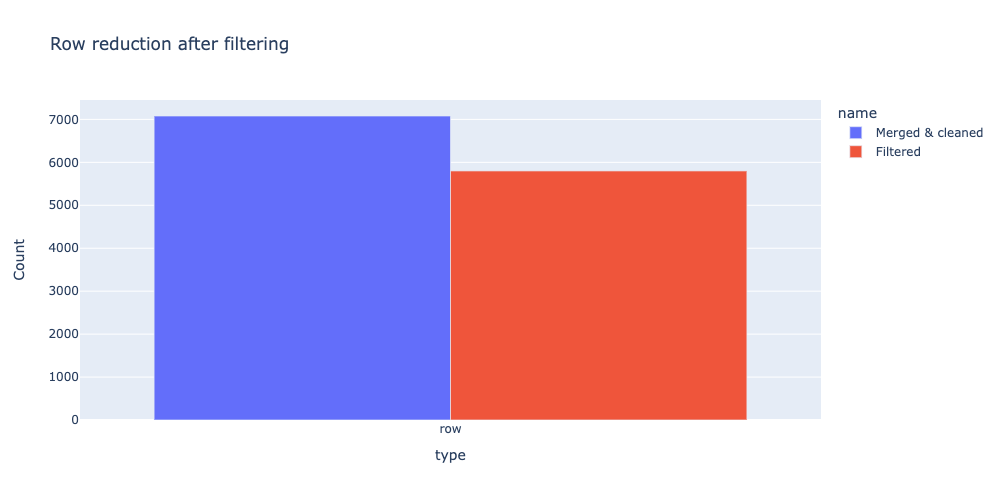

In [116]:
df_plot = pd.DataFrame(list(zip(row, col, name)),
                       columns=['Count', 'type', 'name'])
fig = px.bar(df_plot, x="type", y="Count",
             color='name', barmode='group',
             height=500, width=400, title="Row reduction after filtering")
fig.show()
write_image(fig, "./Images/row_reduction.svg", format='svg')

In [117]:
row = [df.shape[1], process_df.shape[1]]
col = ['column', 'column']
name = ['Merged & cleaned', 'Filtered']

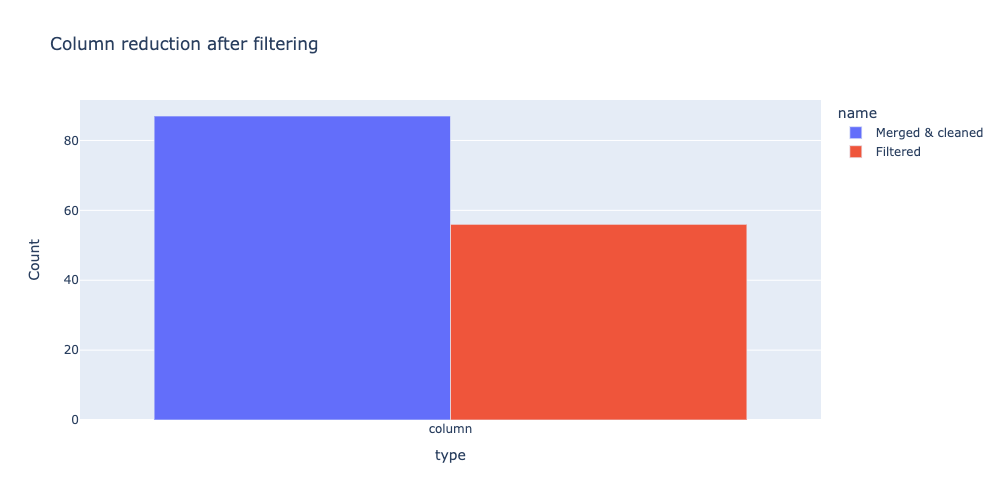

In [118]:
df_plot = pd.DataFrame(list(zip(row, col, name)),
                       columns=['Count', 'type', 'name'])
fig = px.bar(df_plot, x="type", y="Count",
             color='name', barmode='group',
             height=500, width=400, title="Column reduction after filtering")
fig.show()
write_image(fig, "./Images/column_reduction.svg", format='svg')

In [119]:
ima_df = pd.read_csv('../data/ima/data.csv', index_col=0)
web_df = pd.read_csv('../data/webmineral/data.csv', index_col=0)
min_df = pd.read_csv('../data/mindat/data.csv', index_col=0)
wiki_df = pd.read_csv('../data/wikipedia/data.csv', index_col=0)

In [120]:
row, col = list(zip(*[ima_df.shape, web_df.shape, min_df.shape, wiki_df.shape]))
name = ['IMA', 'Web Mineral', 'Mindat', 'Wikipedia']

In [121]:
df_plot = pd.DataFrame(list(zip(row, col, name)),
                       columns=['rows', 'cols', 'name'])

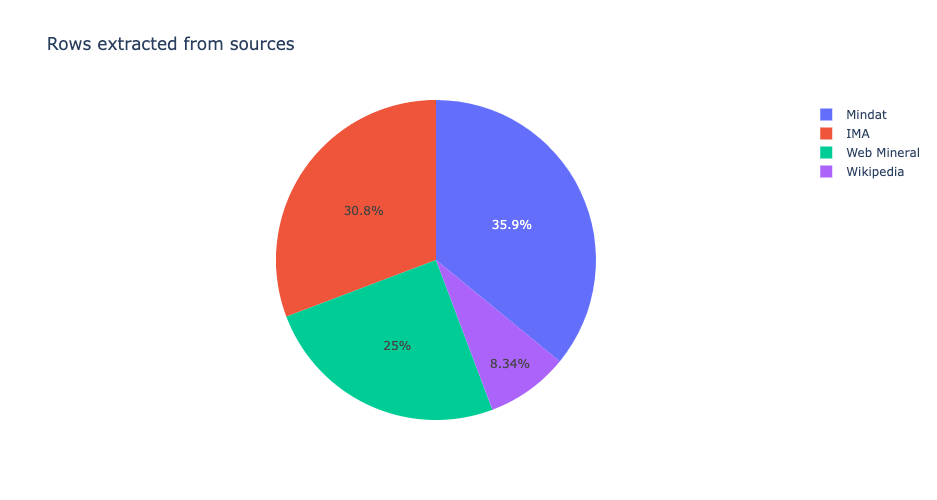

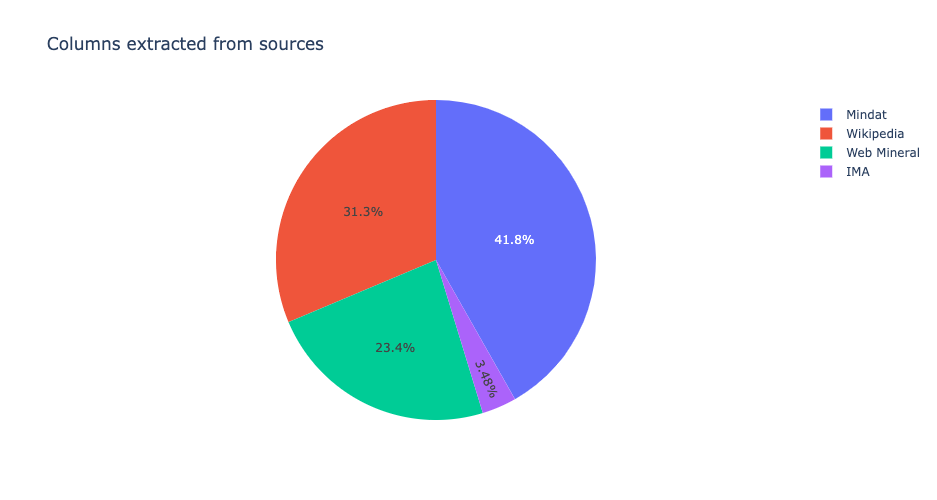

In [126]:
fig = px.pie(df_plot, values='rows', names='name', title='Rows extracted from sources', width=500, height=500)
fig.show()
write_image(fig, "./Images/row_extacted_pie.svg", format='svg')
fig = px.pie(df_plot, values='cols', names='name', title='Columns extracted from sources', width=500, height=500)
fig.show()
write_image(fig, "./Images/col_extracted_pie.svg", format='svg')

In [123]:
common_attr = {
    "Mindat": {'mineral_name', '2v', 'anisotropism', 'approval history',
        'ima year', 'bireflectance', 'birefringence', 'cell parameters',
        'class', 'cleavage', 'co-type localities', 'colour',
        'rl color', 'common impurities', 'crystal system', 'dana 7th ed.', 'dana 8th ed.',
        'density', 'dimorph of', 'dispersion', 'elements listed',
        'epitaxial minerals', 'external links', 'first published',
        'formula', 'fracture', 'geological setting',
        'hardness', 'health risks', 'hey\'s cim ref.',
        'idealised formula', 'ima status', 'ima status notes',
        'in uv light', 'industrial uses', 'internal reflections', 'ir spectrum',
        'isostructural with', 'lustre', 'magnetism', 'member of',
        'mindat.org url', 'mineral dealers', 'morphology', 'name origin',
        'strunz 10th', 'optical extinction',
        'oxide wt%', 'parting', 'pleochroism', 'polymorph of',
        'powder diffraction data', 'axial ratios',
        'reference list', 'reflectivity', 'ri values', 'setting', 'space group',
        'special storage/display requirements', 'gravity', 'streak',
        'strunz 8th', 'strunz 9th', 'surface relief', 'tenacity',
        'thermal behaviour', 'transparency', 'twinning', 'type',
        'locality', 'unit cell v', 'z'},
    "Web Mineral": {'mineral_name', 'axial ratios', 'cell dimensions', 'formula',
        'cleavage', 'color', 'composition',
        'crystal system', 'dana class', 'density', 'transparency',
        'dichroism (e)', 'dichroism (w)', 'electron density',
        'empirical formula', 'environment', 'fermion index',
        'fracture', 'gladstone-dale', 'habit', 'hardness', 'ima status',
        'locality', 'luminescence', 'luster', 'magnetism',
        'name origin', 'optical data', 'photoelectric',
        'pleochroism (x)', 'pleochroism (y)', 'pleochroism (z)',
        'radioactivity', 'anisotropism', 'rl bireflectance',
        'rl color', 'rl pleochroism', 'streak', 'strunz class',
        'synonym', 'x ray diffraction'},
    "Wikipedia": {'mineral_name', '2v', 'art & architecture thesaurus id (p1014)',
        'babelnet id (p2581)', 'birefringence', 'class', 'cleavage',
        'colour', 'commons category (p373)', 'crystal system', 'dana 7th ed.',
        'dana 8th ed.', 'density', 'described by source (p1343)',
        'description', 'transparency', 'dispersion', 'elhuyar zth id (p4746)',
        'encyclopædia britannica online id (p1417)',
        'fluorescence', 'fracture',
        'freebase id (p646)', 'google knowledge graph id (p2671)',
        'gravity',
        'habit',
        'ima year', 'ima status',
        'kbpedia id (p8408)', 'kivid.info id (p7348)', 'luster',
        'microsoft academic id (p6366)', 'hardness',
        'molweight', 'name origin',
        'strunz 10th',
        'strunz 9th', 'optical data',
        'other', 'pleochroism', 'refractive',
        'solid solution series with (p2155)', 'solubility',
        'space group', 'store norske leksikon id (p4342)', 'streak', 'strunz',
        'strunz 8th', 'subclass of (p279)',
        'symmetry', 'system', 'tenacity', 'twinning',
        'locality', 'unit cell',
        'wolfram language entity code (p4839)'},
    "IMA": {'mineral_name', 'country', 'first ref', 'formula', 'ima status',
        'ima year', 'second ref'}
}

In [124]:
cmaps = ["cool", list("rgb"), "plasma", "viridis", "Set1"]

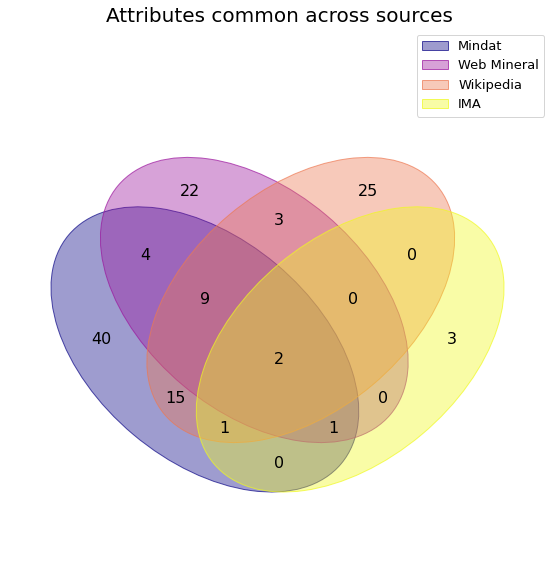

In [125]:
_, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 10))
plt.title('Attributes common across sources', fontsize=20)

venn(common_attr, cmap=cmaps[2], fontsize=16, ax=ax)
plt.legend(common_attr, fontsize = 13, loc='best')
plt.savefig('./Images/attribute_venn.png')